In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving areas.csv to areas (1).csv
Saving homeprices.csv to homeprices (1).csv


In [ ]:
import io
area = pd.read_csv(io.BytesIO(uploaded['areas.csv']))
homeprices = pd.read_csv(io.BytesIO(uploaded['homeprices.csv']))

In [ ]:
area

In [ ]:
homeprices

#Linear Regression

## step1

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['homeprices.csv']))

In [ ]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
df.price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [ ]:
df.columns

Index(['area', 'price'], dtype='object')

In [ ]:
y = df.price

In [ ]:
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
df.area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [ ]:
x = df.area
x

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [ ]:
type(x)

pandas.core.series.Series

#Create a Scatter Plot

In [ ]:
import matplotlib.pyplot as plt


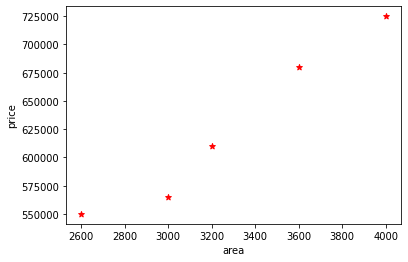

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(x,y,color="r",marker='*')

In [23]:
print(type(df.area))

<class 'pandas.core.series.Series'>


In [25]:
new_df = df.drop('price',axis='columns')
new_df


,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [26]:
type(new_df)

pandas.core.frame.DataFrame

In [29]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [30]:
type(price)

pandas.core.series.Series

#Create a Linear Regression Model and training it, to predict the price for a given area

In [31]:
from sklearn import linear_model

In [32]:
reg=linear_model.LinearRegression()
reg.fit(new_df,price)
reg.score(new_df,price)

0.9584301138199486

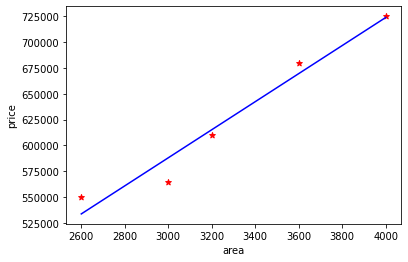

In [33]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='*')
plt.plot(new_df,reg.predict(new_df),color='blue')

# Predicting the prices for the given area

In [34]:
reg.predict([[3200]])


array([615136.98630137])

In [35]:
reg.predict([[3300]])


array([628715.75342466])

## Coefficient

In [36]:
reg.coef_


array([135.78767123])

## Intercept

In [37]:
reg.intercept_

180616.43835616432

In [38]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [39]:
reg.predict([[5000]])

array([859554.79452055])

#Generate CSV file with list of home price predictions

In [41]:
area_df = pd.read_csv(io.BytesIO(uploaded['areas.csv']))
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [42]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [43]:
reg.score(area_df,p)

1.0

In [44]:
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [45]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [46]:
area_df.to_csv("prediction20.csv")
!cp prediction20.csv "drive/My Drive/INFIDATA MACHINE LEARNING"